In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,33.0,34.2,36.0,12.0,22.3,53.9,1.2,...,88.3,2.7,8.8,11.4,5.8,1.1,1.8,3.6,40.8,2023-24
2,2,Luka Doncic,DAL,39.0,37.3,34.4,11.7,24.0,48.8,3.9,...,77.6,0.8,7.8,8.6,9.4,1.4,0.6,3.9,36.2,2023-24
3,3,Shai Gilgeous-Alexander,OKC,45.0,34.2,31.1,11.0,20.1,54.7,1.2,...,88.9,0.9,4.7,5.6,6.4,2.2,0.8,2.1,33.8,2023-24
4,4,Giannis Antetokounmpo,MIL,44.0,35.1,31.0,11.6,19.0,60.8,0.4,...,66.4,2.6,9.0,11.7,6.2,1.3,1.1,3.6,36.5,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,JT Thor,CHA,37.0,14.3,3.3,1.3,3.6,36.4,0.5,...,54.5,1.0,1.7,2.7,0.4,0.2,0.5,0.3,4.3,2023-24
260,260,Zeke Nnaji,DEN,36.0,9.4,3.1,1.1,2.4,46.6,0.1,...,64.1,1.1,1.0,2.1,0.5,0.3,0.6,0.6,4.2,2023-24
261,261,Jaxson Hayes,LAL,36.0,9.5,2.8,1.2,1.8,66.2,0.0,...,53.6,0.4,1.2,1.7,0.3,0.2,0.3,0.5,3.9,2023-24
262,262,Andre Jackson Jr.,MIL,39.0,11.5,2.8,1.1,2.0,55.1,0.4,...,88.9,0.9,1.3,2.2,0.9,0.3,0.1,0.5,4.9,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       264 non-null    object 
 1   PLAYER  263 non-null    object 
 2   TEAM    263 non-null    object 
 3   GP      263 non-null    float64
 4   MIN     263 non-null    float64
 5   PTS     263 non-null    float64
 6   FGM     263 non-null    float64
 7   FGA     263 non-null    float64
 8   FG%     263 non-null    float64
 9   3PM     263 non-null    float64
 10  3PA     263 non-null    float64
 11  3P%     263 non-null    float64
 12  FTM     263 non-null    float64
 13  FTA     263 non-null    float64
 14  FT%     263 non-null    float64
 15  OREB    263 non-null    float64
 16  DREB    263 non-null    float64
 17  REB     263 non-null    float64
 18  AST     263 non-null    float64
 19  STL     263 non-null    float64
 20  BLK     263 non-null    float64
 21  TOV     263 non-null    float64
 22  EF

# Data Cleaning

In [4]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [5]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,33.0,34.2,36.0,12.0,22.3,53.9,1.2,...,12.2,88.3,2.7,8.8,11.4,5.8,1.1,1.8,3.6,40.8
2,2023-24,Luka Doncic,DAL,39.0,37.3,34.4,11.7,24.0,48.8,3.9,...,9.2,77.6,0.8,7.8,8.6,9.4,1.4,0.6,3.9,36.2
3,2023-24,Shai Gilgeous-Alexander,OKC,45.0,34.2,31.1,11.0,20.1,54.7,1.2,...,9.0,88.9,0.9,4.7,5.6,6.4,2.2,0.8,2.1,33.8
4,2023-24,Giannis Antetokounmpo,MIL,44.0,35.1,31.0,11.6,19.0,60.8,0.4,...,11.2,66.4,2.6,9.0,11.7,6.2,1.3,1.1,3.6,36.5
5,2023-24,Devin Booker,PHX,37.0,36.1,28.6,10.0,19.8,50.5,2.3,...,7.2,88.0,0.7,4.2,4.9,7.3,0.9,0.4,2.8,28.6


In [6]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 263
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    263 non-null    object 
 1   PLAYER  263 non-null    object 
 2   TEAM    263 non-null    object 
 3   GP      263 non-null    float64
 4   MIN     263 non-null    float64
 5   PTS     263 non-null    float64
 6   FGM     263 non-null    float64
 7   FGA     263 non-null    float64
 8   FG%     263 non-null    float64
 9   3PM     263 non-null    float64
 10  3PA     263 non-null    float64
 11  3P%     263 non-null    float64
 12  FTM     263 non-null    float64
 13  FTA     263 non-null    float64
 14  FT%     263 non-null    float64
 15  OREB    263 non-null    float64
 16  DREB    263 non-null    float64
 17  REB     263 non-null    float64
 18  AST     263 non-null    float64
 19  STL     263 non-null    float64
 20  BLK     263 non-null    float64
 21  TOV     263 non-null    float64
 22  EF

# Visualization

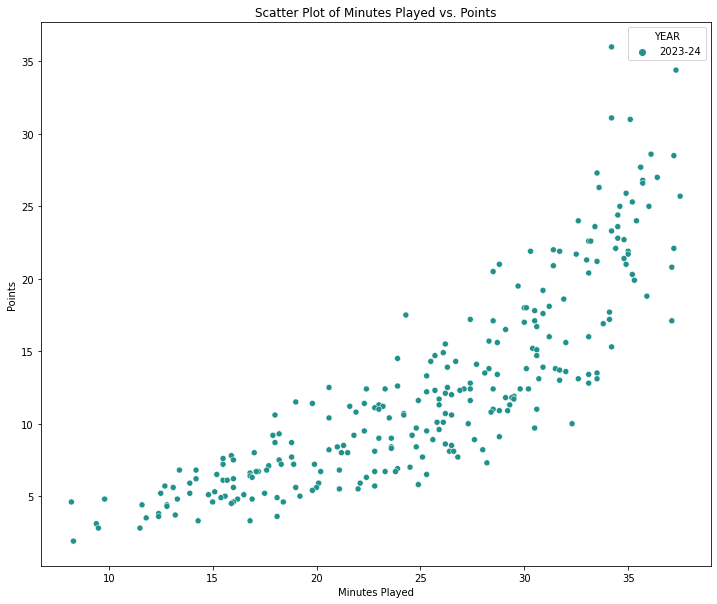

In [7]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [8]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
10,2023-24,Trae Young,ATL,41.0,36.4,27.0,8.3,19.7,42.3,3.2,...,8.3,86.2,0.5,2.4,2.9,10.8,1.4,0.2,4.3,25.7
2,2023-24,Luka Doncic,DAL,39.0,37.3,34.4,11.7,24.0,48.8,3.9,...,9.2,77.6,0.8,7.8,8.6,9.4,1.4,0.6,3.9,36.2
13,2023-24,Nikola Jokic,DEN,46.0,33.6,26.3,10.2,17.3,59.1,1.0,...,5.9,81.5,3.0,9.0,12.0,8.9,1.1,0.9,2.9,38.2
5,2023-24,Devin Booker,PHX,37.0,36.1,28.6,10.0,19.8,50.5,2.3,...,7.2,88.0,0.7,4.2,4.9,7.3,0.9,0.4,2.8,28.6
16,2023-24,Damian Lillard,MIL,43.0,35.2,25.3,7.4,17.5,42.3,3.0,...,8.1,92.2,0.5,3.8,4.3,6.8,1.1,0.1,2.4,24.5
15,2023-24,Tyrese Maxey,PHI,42.0,37.5,25.7,8.8,19.7,44.8,3.1,...,5.8,86.4,0.6,3.0,3.6,6.6,1.0,0.5,1.6,24.2
12,2023-24,Jalen Brunson,NYK,44.0,35.7,26.6,9.4,19.5,48.0,2.8,...,6.1,83.5,0.6,3.3,3.9,6.5,0.9,0.2,2.4,24.5
3,2023-24,Shai Gilgeous-Alexander,OKC,45.0,34.2,31.1,11.0,20.1,54.7,1.2,...,9.0,88.9,0.9,4.7,5.6,6.4,2.2,0.8,2.1,33.8
4,2023-24,Giannis Antetokounmpo,MIL,44.0,35.1,31.0,11.6,19.0,60.8,0.4,...,11.2,66.4,2.6,9.0,11.7,6.2,1.3,1.1,3.6,36.5
7,2023-24,Donovan Mitchell,CLE,34.0,35.6,27.7,9.7,21.1,46.0,3.1,...,6.0,86.3,1.0,4.5,5.5,6.1,1.9,0.4,2.9,26.6


In [9]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
18,2023-24,Anthony Davis,LAL,45.0,36.0,25.0,9.5,17.1,55.5,0.3,...,7.0,80.8,3.2,9.0,12.2,3.7,1.1,2.4,2.1,33.3
13,2023-24,Nikola Jokic,DEN,46.0,33.6,26.3,10.2,17.3,59.1,1.0,...,5.9,81.5,3.0,9.0,12.0,8.9,1.1,0.9,2.9,38.2
4,2023-24,Giannis Antetokounmpo,MIL,44.0,35.1,31.0,11.6,19.0,60.8,0.4,...,11.2,66.4,2.6,9.0,11.7,6.2,1.3,1.1,3.6,36.5
1,2023-24,Joel Embiid,PHI,33.0,34.2,36.0,12.0,22.3,53.9,1.2,...,12.2,88.3,2.7,8.8,11.4,5.8,1.1,1.8,3.6,40.8
21,2023-24,Julius Randle,NYK,46.0,35.4,24.0,8.6,18.2,47.2,1.7,...,6.6,78.1,2.2,7.0,9.2,5.0,0.5,0.3,3.5,24.5
20,2023-24,Lauri Markkanen,UTA,37.0,32.6,24.0,8.1,16.2,49.7,3.3,...,5.3,87.3,2.4,6.4,8.8,1.9,0.9,0.6,1.2,26.2
2,2023-24,Luka Doncic,DAL,39.0,37.3,34.4,11.7,24.0,48.8,3.9,...,9.2,77.6,0.8,7.8,8.6,9.4,1.4,0.6,3.9,36.2
11,2023-24,Jayson Tatum,BOS,43.0,35.7,26.8,9.0,19.2,46.8,3.0,...,7.2,81.3,0.9,7.5,8.4,4.3,1.0,0.5,2.5,27.0
17,2023-24,LeBron James,LAL,42.0,34.6,25.0,9.4,18.0,52.1,2.2,...,5.5,74.9,0.9,6.5,7.5,7.6,1.3,0.5,3.4,28.6
6,2023-24,Kevin Durant,PHX,39.0,37.2,28.5,10.2,19.2,53.1,2.3,...,6.7,87.3,0.5,5.9,6.4,5.7,0.8,1.2,3.2,29.6


In [10]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,33.0,34.2,36.0,12.0,22.3,53.9,1.2,...,12.2,88.3,2.7,8.8,11.4,5.8,1.1,1.8,3.6,40.8
2,2023-24,Luka Doncic,DAL,39.0,37.3,34.4,11.7,24.0,48.8,3.9,...,9.2,77.6,0.8,7.8,8.6,9.4,1.4,0.6,3.9,36.2
3,2023-24,Shai Gilgeous-Alexander,OKC,45.0,34.2,31.1,11.0,20.1,54.7,1.2,...,9.0,88.9,0.9,4.7,5.6,6.4,2.2,0.8,2.1,33.8
4,2023-24,Giannis Antetokounmpo,MIL,44.0,35.1,31.0,11.6,19.0,60.8,0.4,...,11.2,66.4,2.6,9.0,11.7,6.2,1.3,1.1,3.6,36.5
5,2023-24,Devin Booker,PHX,37.0,36.1,28.6,10.0,19.8,50.5,2.3,...,7.2,88.0,0.7,4.2,4.9,7.3,0.9,0.4,2.8,28.6
6,2023-24,Kevin Durant,PHX,39.0,37.2,28.5,10.2,19.2,53.1,2.3,...,6.7,87.3,0.5,5.9,6.4,5.7,0.8,1.2,3.2,29.6
7,2023-24,Donovan Mitchell,CLE,34.0,35.6,27.7,9.7,21.1,46.0,3.1,...,6.0,86.3,1.0,4.5,5.5,6.1,1.9,0.4,2.9,26.6
8,2023-24,De'Aaron Fox,SAC,38.0,35.6,27.7,9.8,20.9,46.9,3.1,...,6.7,73.0,0.9,3.2,4.0,5.6,1.6,0.4,2.5,23.9
9,2023-24,Stephen Curry,GSW,40.0,33.5,27.3,8.8,19.5,44.9,4.7,...,5.5,92.8,0.5,3.8,4.2,5.0,0.9,0.4,3.0,23.6
10,2023-24,Trae Young,ATL,41.0,36.4,27.0,8.3,19.7,42.3,3.2,...,8.3,86.2,0.5,2.4,2.9,10.8,1.4,0.2,4.3,25.7


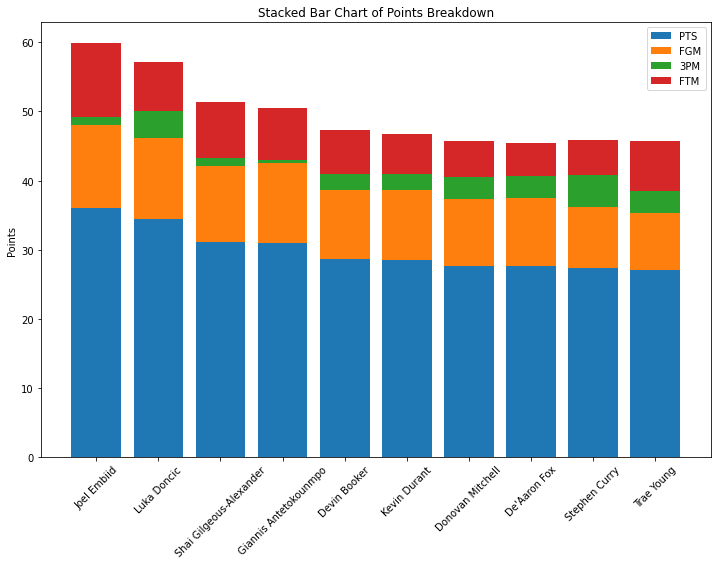

In [11]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [13]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
13             Nikola Jokic  2023-24  33.6  26.3  12.0
4     Giannis Antetokounmpo  2023-24  35.1  31.0  11.7
1               Joel Embiid  2023-24  34.2  36.0  11.4
2               Luka Doncic  2023-24  37.3  34.4   8.6
11             Jayson Tatum  2023-24  35.7  26.8   8.4
6              Kevin Durant  2023-24  37.2  28.5   6.4
3   Shai Gilgeous-Alexander  2023-24  34.2  31.1   5.6
7          Donovan Mitchell  2023-24  35.6  27.7   5.5
5              Devin Booker  2023-24  36.1  28.6   4.9
9             Stephen Curry  2023-24  33.5  27.3   4.2


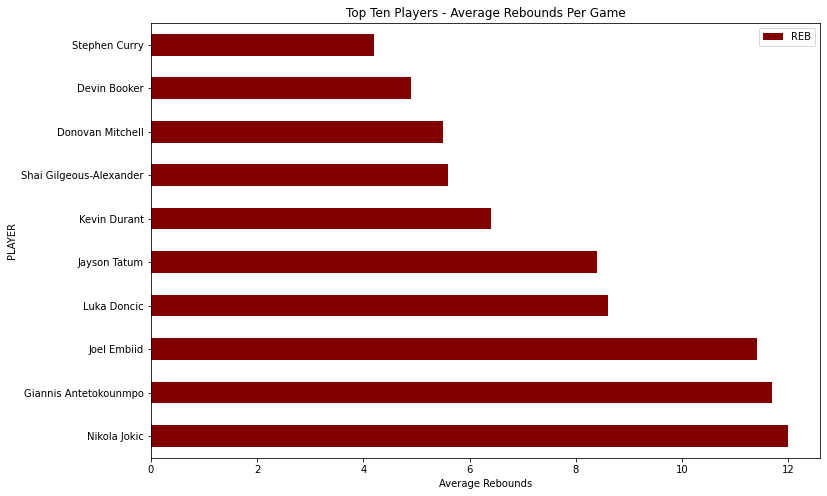

In [14]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 263
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    263 non-null    object 
 1   PLAYER  263 non-null    object 
 2   TEAM    263 non-null    object 
 3   GP      263 non-null    float64
 4   MIN     263 non-null    float64
 5   PTS     263 non-null    float64
 6   FGM     263 non-null    float64
 7   FGA     263 non-null    float64
 8   FG%     263 non-null    float64
 9   3PM     263 non-null    float64
 10  3PA     263 non-null    float64
 11  3P%     263 non-null    float64
 12  FTM     263 non-null    float64
 13  FTA     263 non-null    float64
 14  FT%     263 non-null    float64
 15  OREB    263 non-null    float64
 16  DREB    263 non-null    float64
 17  REB     263 non-null    float64
 18  AST     263 non-null    float64
 19  STL     263 non-null    float64
 20  BLK     263 non-null    float64
 21  TOV     263 non-null    float64
 22  EF

In [16]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [17]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

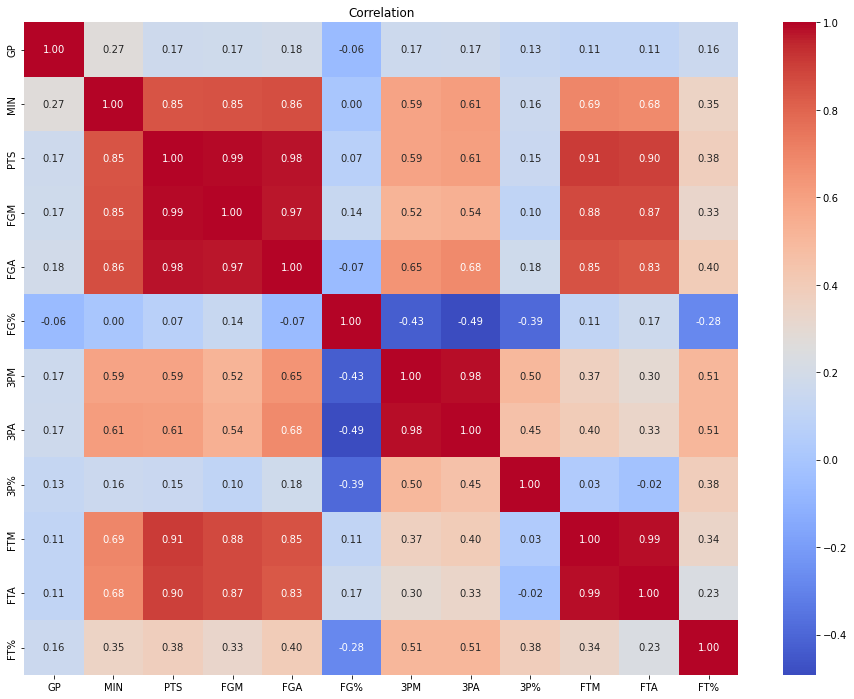

In [18]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


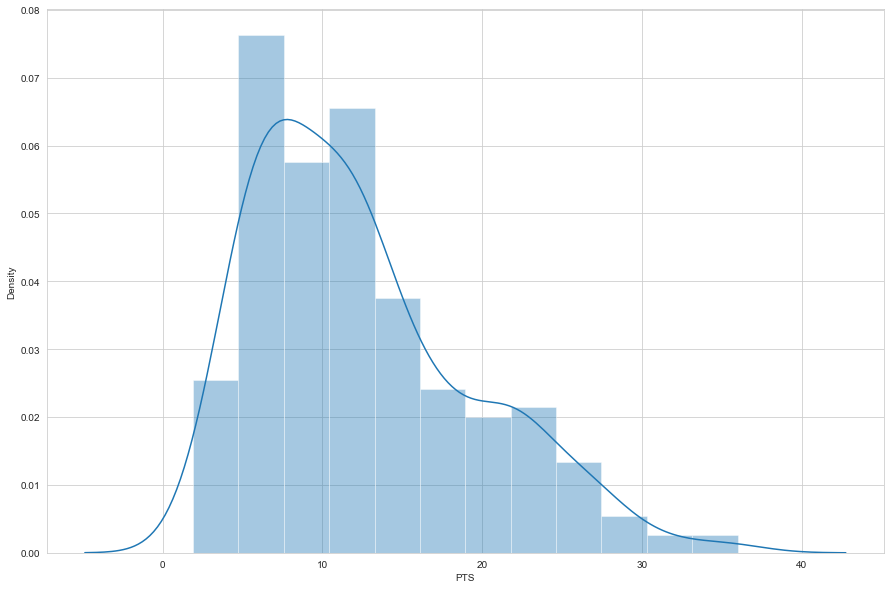

In [19]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()